In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group # Used for random rotation of covariance matrix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import sys
sys.path.insert(1,'../../src')
import utils.general_tools as gt
import utils.setConfig as sc
config = pd.read_csv(f'../../bucket/config/{sc.select_data_folder()}',index_col=0)

In [23]:
embeddings_without_ChatGPT_path=config.loc['embeddings_dataset_without_ChatGPT'][0]
X_emb= pd.read_csv(embeddings_without_ChatGPT_path,index_col=0)
X_emb
y = pd.read_csv(config.loc['inference_sep2023_model_without_chatGPT'][0],index_col=0)
X=X_emb.iloc[list(y.query('label==1').index)]
X_text=pd.read_csv(config.loc['data_postETL_and_featureEng'][0])
X_text=X_text.iloc[list(y.query('label==1').index)]
y=y.query('label==1')

In [8]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)

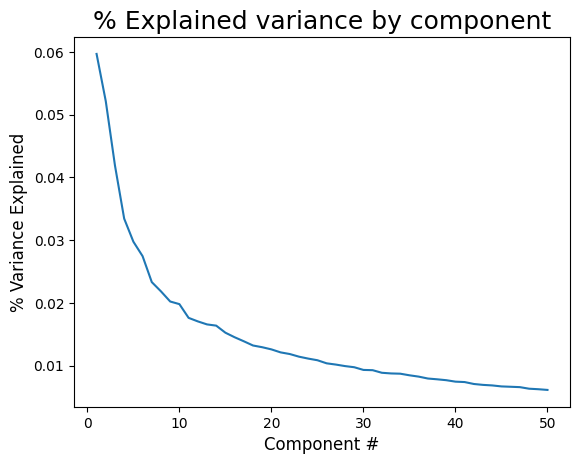

In [9]:
plt.plot(np.arange(1,51),pca.explained_variance_ratio_[0:50])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=12)
plt.ylabel("% Variance Explained",size=12)
plt.show()

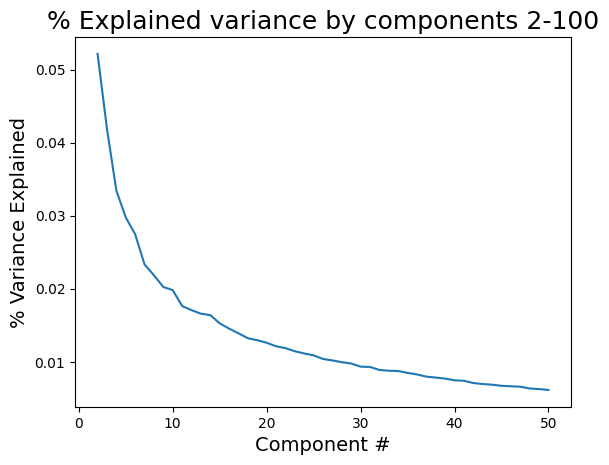

In [10]:
plt.plot(np.arange(2,51),pca.explained_variance_ratio_[1:50])
plt.title("% Explained variance by components 2-100",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

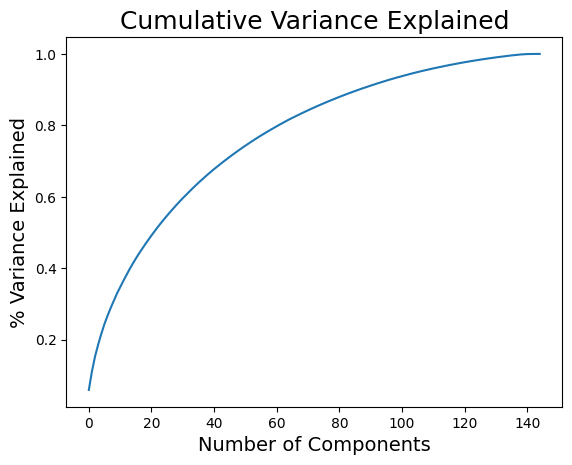

In [11]:
plt.plot(np.arange(0,y.shape[0]),np.cumsum(pca.explained_variance_ratio_[0:y.shape[0]]))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [14]:
min_feat_past_threshold=np.where(np.cumsum(pca.explained_variance_ratio_) >=.95)[0][0]
print(min_feat_past_threshold)

106


/home/oneking/Documents/Github_Projects/twitter_pf_NLP/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


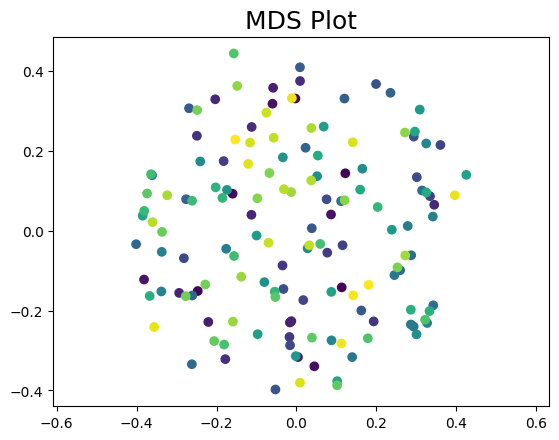

In [15]:
# MDS can be slow when n is large
mds = MDS(n_components=4,verbose=1,eps=1e-5)
mds.fit(X)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=np.arange(y.shape[0]))
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.001s...
[t-SNE] Computed neighbors for 145 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.148219
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.420300
[t-SNE] KL divergence after 1000 iterations: 0.684720


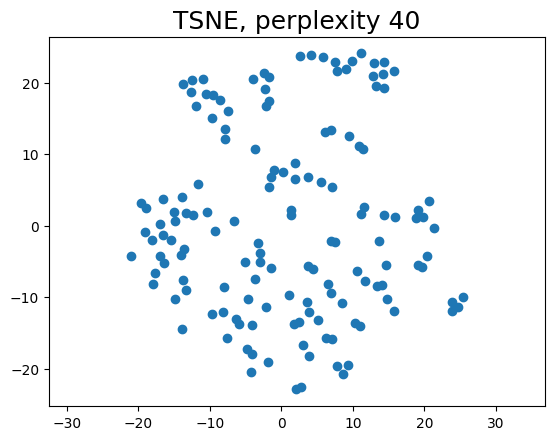

In [16]:
tsne = TSNE(n_components=2,verbose=1,perplexity=10, learning_rate=10)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.000s...
[t-SNE] Computed neighbors for 145 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.189146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.845943
[t-SNE] KL divergence after 1000 iterations: 0.512148


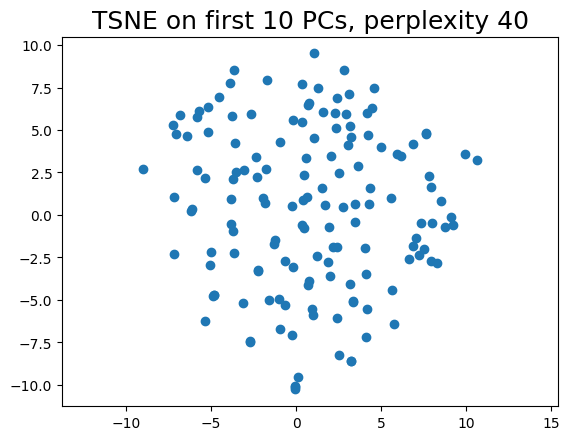

In [17]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE on first 10 PCs, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.000s...
[t-SNE] Computed neighbors for 145 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.172718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.798904
[t-SNE] KL divergence after 1000 iterations: 0.677604


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      label
0        1
1        1
2        1
3        1
4        1
..     ...
192      1
193      1
194      1
195      1
199      1

[145 rows x 1 columns]

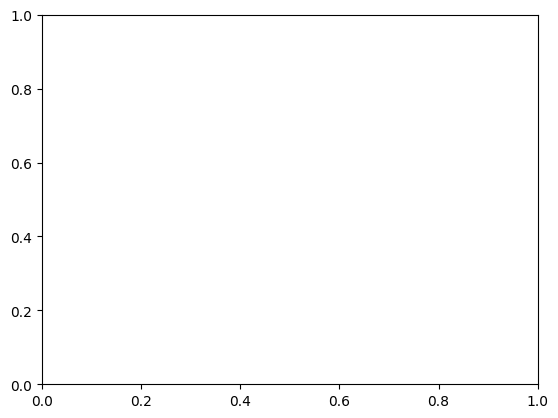

In [18]:
tsne = TSNE(n_components=2,verbose=1,perplexity=20)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("TSNE on first 10 PCs, perplexity 5",size=18)
plt.axis("equal")
plt.show()

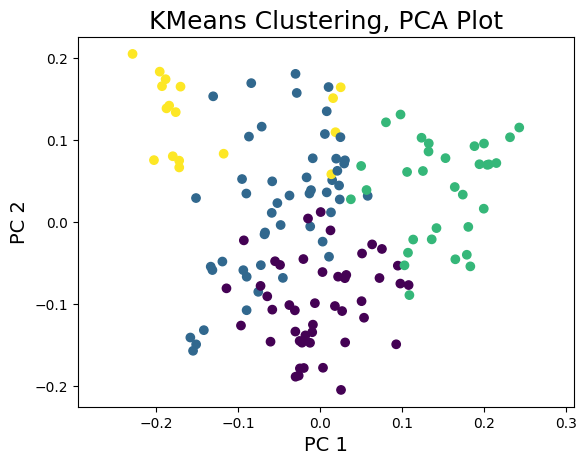

In [19]:
kmeans = KMeans(n_clusters=4,n_init=10)
y = kmeans.fit_predict(X)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

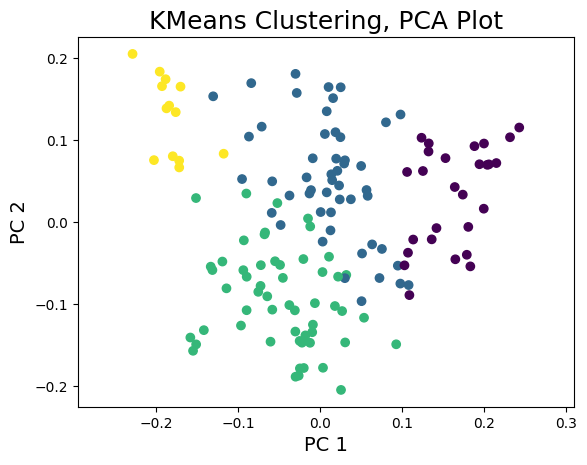

In [20]:
# More initializations
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

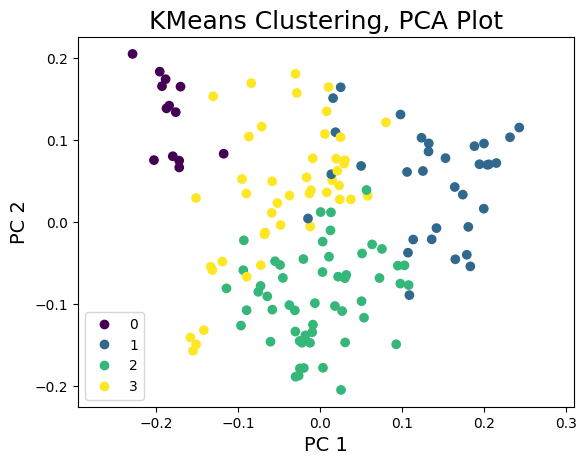

['iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k',
 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k',
 'not a good start for iphone 15 pro 3817409569k',
 'final cut pro for mac is ready for the iphone 15 pro https9to5maccom20230919finalcutiphone15pro... by apollozac9to5maccomfinal cut pro for mac is ready for the iphone 15 pro  9to5macapple is releasing the iphone 15 pro on friday and with it comes new prograde video capture features ahead of3978278k']

In [24]:
# Reduced dimension
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z[:,0:min_feat_past_threshold])
centers=kmeans.cluster_centers_
scatter=plt.scatter(z[:,0],z[:,1],c=y)
plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()
ps_centroids=[]
for i,item in enumerate(centers.tolist()):
    # print(item)
    prev=float('infinity')
    min_j=0
    for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
        # print(item[:5],'|',post[:5])
        diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
        diff=min(diff,prev)
        if diff!=prev:
            min_j=j
        prev=diff
    ps_centroids.append(min_j)
X_text.iloc[ps_centroids].text.tolist()

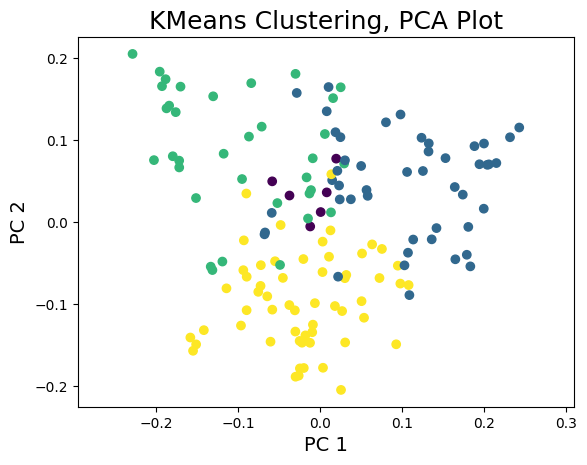

In [25]:
kmed = KMedoids(n_clusters=4,max_iter=1000,init='k-medoids++')
y = kmed.fit_predict(z[:,:])
centers=kmed.cluster_centers_
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

EM clustering is a more versatile clustering algorithm that can adapt to non-spherical clusters, which I think makes the most sense when dealing with something non-uniform such as natural language embeddings. 

read: https://www.linkedin.com/pulse/clustering-k-means-vs-em-basics-venki-manoharan/

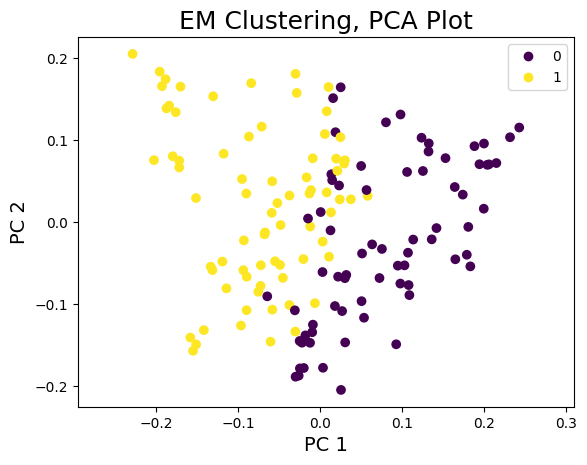

['after comparing over 500 photos and videosits time iphone 15 pro max vs samsung galaxy s23 ultra camera comparison httpsyoutubecplisjz8cnw17923542642687k', 'iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k']


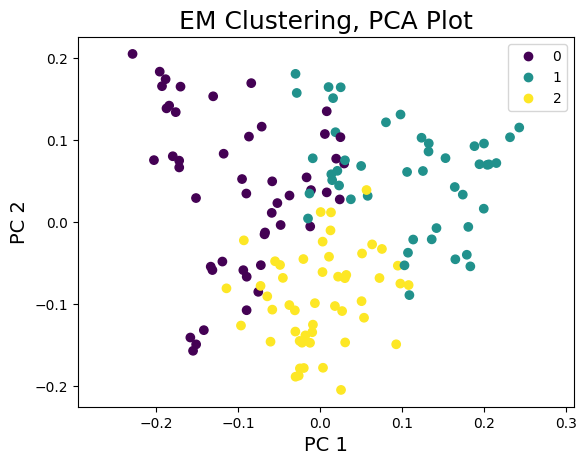

['iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k', 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k', 'not a good start for iphone 15 pro 3817409569k']


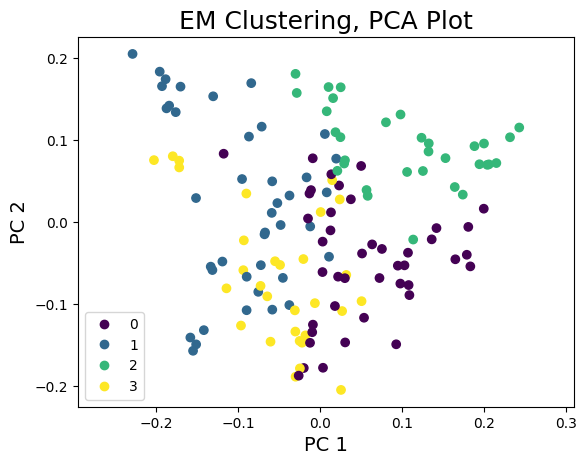

['iphone 15 pro max natural titanium  my new daily phonehttpsyoutubeol4bdmt5im1857915699k', 'iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k', 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k', 'not a good start for iphone 15 pro 3817409569k']


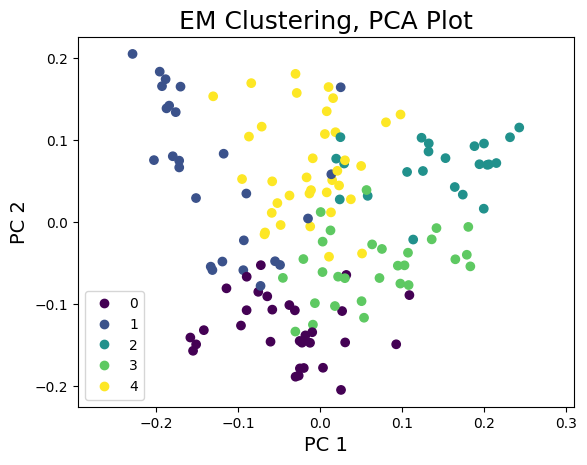

['iphone 15 linequotevaibhav jainvvaiibhavsep 21apple iphone 15 waiting line at dubai mall video azzy123789610657386', 'iphone 15 provides more details on battery health and let us users limit charge to 80 https9to5maccom20230920iphone15batteryhealth... by filipeesposito9to5maccomiphone 15 provides more details on battery healthright after apple released ios 17 rc to developers and beta users last week 9to5mac found code references to a61166268k', 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k', 'iphone 15 pro max natural titanium  my new daily phonehttpsyoutubeol4bdmt5im1857915699k', 'some people are worrying about the iphone 15 pro overheating and not charging while in apples new console gaming modeheres the solution to both problems apples usbc mult

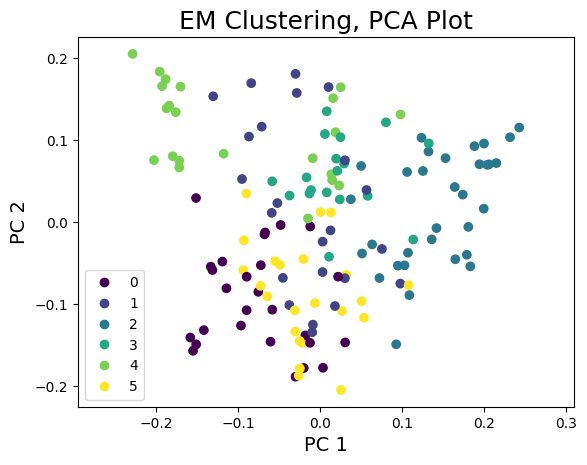

['apples iphone 15 gets thumbs up from chinese consumers with preorders boomingscmpcomapples iphone 15 gets thumbs up from chinese consumers with preorders boomingpreorder sales of iphone 15 in china get off to robust start indicating demand is still strong for us giants iconic handset despite huawei revival and partial government ban3925111k', 'ordered an iphone 15 verizon has 23 off cases and usbc accessories for your new iphone httpsmacrumorscom20230920verizon20offcasesiphone15...316190581k', 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k', 'final cut pro for mac is ready for the iphone 15 pro https9to5maccom20230919finalcutiphone15pro... by apollozac9to5maccomfinal cut pro for mac is ready for the iphone 15 pro  9to5macapple is releasing the iphone

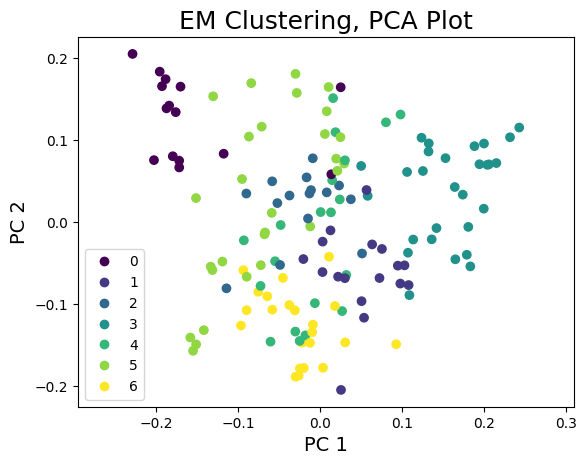

['iphone 15 models finally show batterys cycle count httpsmacrumorscom20230920iphone15showsbatterycyclecountutmsourcedlvritutmmediumtwitter...214601039k', 'incase you missed it... unboxing and my first thoughts with iphone 15 pro and iphone 15 pro max  httpsyoutubek7t1czkxaysiofzqabobemezgoqu...6121486129', 'apple says fingerprints can temporarily alter the color of iphone 15 pros titanium frame httpsmacrumorscom20230921appleoniphone15profingerprints...7796904298k', 'iphone 15 pro max is a great camera  smart hdr 5 not only rivals but also beats the s23 ultra in many situations image 1 this is a much needed updateiphones nextgen portraits truly are nextgen edge detection is on par and even exceeds the s23 ultra image 2... show more6310113342287k', 'not a good start for iphone 15 pro 3817409569k', 'video apples new iphone 15 and iphone 15 pro each have a usbc port but the capabilities of this port differ between models here is what you need to knowappleinsidercomeverything you need to k

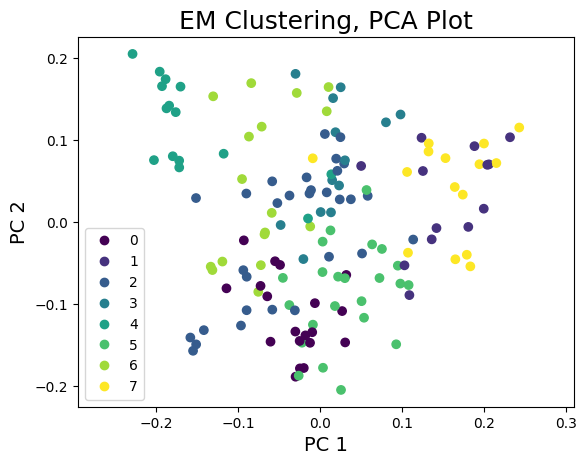

['not a good start for iphone 15 pro 3817409569k', 'a little detail about mrwhosetheboss camera battle between the iphone 15 pro max and galaxy s23 ultra caught my attentionif the portrait mode does not have a 2x zoom toggle the galaxy s23 ultra that arun tested was definitely running the may 2023 software at the very latest... show more1461822088267k', 'final cut pro for mac is ready for the iphone 15 pro https9to5maccom20230919finalcutiphone15pro... by apollozac9to5maccomfinal cut pro for mac is ready for the iphone 15 pro  9to5macapple is releasing the iphone 15 pro on friday and with it comes new prograde video capture features ahead of3978278k', 'fun fact apple is trying to push sustained performance on the a17 pro chip so much that they are allowing the external iphone 15 pro temperatures to hit 11858 farenheit which is apparently enough to cause a firstdegree burninteresting be careful out there gamersquotecorruptedbirdiecorruptedbirdiesep 19replying to roland98 and vadimyuryevl

In [28]:
for i in range(2,9):
    em=GaussianMixture(n_components=i, tol=0.000001,n_init=100)
    y = em.fit_predict(z[:,0:min_feat_past_threshold])
    centers=em.means_
    scatter=plt.scatter(z[:,0],z[:,1],c=y)
    plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
    plt.title("EM Clustering, PCA Plot",size=18)
    plt.xlabel("PC 1",size=14)
    plt.ylabel("PC 2",size=14)
    plt.axis("equal")
    plt.show()
    ps_centroids=[]
    for i,item in enumerate(centers.tolist()):
        # print(item)
        prev=float('infinity')
        min_j=0
        for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
            # print(item[:5],'|',post[:5])
            diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
            diff=min(diff,prev)
            if diff!=prev:
                min_j=j
            prev=diff
        ps_centroids.append(min_j)
    print(X_text.iloc[ps_centroids].text.tolist())